# House Price Prediction

The goal of this project is to predict the sales price of residential homes in Ames, Iowa, USA based on various of attributes. It is a supervised regression problem.

# Import Packages

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, shapiro, anderson, kstest, normaltest

# 1. Load the Data

In [39]:
train = pd.read_csv("data/train.csv", header=0)
test = pd.read_csv("data/test.csv", header=0)

# 2. Understand the Data

In [40]:
print("Train: ",train.shape[0],"rows and ",train.shape[1],"features")
print("Test: ",test.shape[0],"rows and ",test.shape[1],"features")

Train:  1460 rows and  81 features
Test:  1459 rows and  80 features


In [41]:
display(train.head(5))
display(test.head(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

There is a mix of qualitative (categorical) and quatitative (numerical) features.

There is a mismatch in datatype between the train and test data set. Let's fix that.

In [44]:
# Create a comparison DataFrame
dtype_comparison = pd.DataFrame({
    'train_dtype': train.dtypes,
    'test_dtype': test.dtypes
})

# Add a column to check if they match
dtype_comparison['match'] = dtype_comparison['train_dtype'] == dtype_comparison['test_dtype']

# Filter where there is a mismatch
dtype_comparison = dtype_comparison[dtype_comparison['match'] == False]

In [45]:
dtype_comparison

,train_dtype,test_dtype,match
BsmtFinSF1,int64,float64,False
BsmtFinSF2,int64,float64,False
BsmtFullBath,int64,float64,False
BsmtHalfBath,int64,float64,False
BsmtUnfSF,int64,float64,False
GarageArea,int64,float64,False
GarageCars,int64,float64,False
SalePrice,int64,NaN,False
TotalBsmtSF,int64,float64,False


Based on the feature description provided:
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, GarageArea, TotalBsmtSF are floats.
- BsmtFullBath, BsmtHalfBath, GarageCars are int.

In [46]:
train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'TotalBsmtSF']] = train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'TotalBsmtSF']].astype('float64')
test[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']] = test[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].fillna(0).astype('int64')

In [47]:
quantitative = train.select_dtypes(include=['float', 'int']).columns.tolist()
qualitative = train.select_dtypes(include=['object']).columns.tolist()

quantitative.remove('SalePrice')
quantitative.remove('Id')

# these features should be qualitative, not quantitative.
additional_qualitative = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',
                          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                          'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

for col in additional_qualitative:
    quantitative.remove(col)

qualitative = qualitative + additional_qualitative

In [48]:
print(f"\nQuantitative features ({len(quantitative)}): {quantitative}")
print(f"Qualitative features ({len(qualitative)}): {qualitative}")
print(f"Total features: {len(quantitative) + len(qualitative)}")


Quantitative features (22): ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Qualitative features (57): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath',

- total number of features: 79
- number of qualitative / categorical features : 57
- number of quantitative / numerical features : 22
- target variable : SalePrice
- row ID : Id

In [49]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [50]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [51]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The house prices range from 34.9k to 755k with a mean of 180.9k.

# 3. Data Cleaning

## 3.1. Check for duplicates

In [52]:
train.duplicated().any()

np.False_

In [53]:
test.duplicated().any()

np.False_

## 3.2. Check for missing data
Let's check for 0, blank, NaN or None values.

In [60]:
def print_missing_values(df):
    """ 
    calculate the 0, blank, NaN or None values in df, in count and %
    filter rows where not all values are 0
    """

    missing_df = pd.concat([
        # Counts
        (df == 0).sum().rename('zeros_count'),
        (df == '').sum().rename('blanks_count'), 
        df.isna().sum().rename('nan_count'),
        (df == None).sum().rename('none_count'),
        
        # Percentages
        ((df == 0).sum() / len(df) * 100).round(1).rename('zeros_%'),
        ((df == '').sum() / len(df) * 100).round(1).rename('blanks_%'), 
        (df.isna().sum() / len(df) * 100).round(1).rename('nan_%'),
        ((df == None).sum() / len(df) * 100).round(1).rename('none_%')
    ], axis=1)

    # Filter rows where not all values are zero
    missing_df = missing_df[(missing_df.select_dtypes(include=[np.number]) != 0).any(axis=1)]

    # Sort by zeros count (descending) and then by NaN count (descending)
    missing_df = missing_df.sort_values(['zeros_count', 'nan_count'], ascending=[False, False])


    # Get columns with zeros (where zeros_count > 0)
    zeros_mask = missing_df['zeros_count'] > 0
    columns_with_zeros = missing_df[zeros_mask].index.tolist()
    
    # Get columns with NaN (where nan_count > 0)
    nan_mask = missing_df['nan_count'] > 0
    columns_with_nan = missing_df[nan_mask].index.tolist()

    display(missing_df)

    return columns_with_zeros, columns_with_nan

In [61]:
train_columns_with_zeros, train_columns_with_nan = print_missing_values(train)

,zeros_count,blanks_count,nan_count,none_count,zeros_%,blanks_%,nan_%,none_%
PoolArea,1453,0,0,0,99.5,0.0,0.0,0.0
3SsnPorch,1436,0,0,0,98.4,0.0,0.0,0.0
LowQualFinSF,1434,0,0,0,98.2,0.0,0.0,0.0
MiscVal,1408,0,0,0,96.4,0.0,0.0,0.0
BsmtHalfBath,1378,0,0,0,94.4,0.0,0.0,0.0
ScreenPorch,1344,0,0,0,92.1,0.0,0.0,0.0
BsmtFinSF2,1293,0,0,0,88.6,0.0,0.0,0.0
EnclosedPorch,1252,0,0,0,85.8,0.0,0.0,0.0
HalfBath,913,0,0,0,62.5,0.0,0.0,0.0
MasVnrArea,861,0,8,0,59.0,0.0,0.5,0.0


In [62]:
test_columns_with_zeros, test_columns_with_nan = print_missing_values(test)

,zeros_count,blanks_count,nan_count,none_count,zeros_%,blanks_%,nan_%,none_%
PoolArea,1453,0,0,0,99.6,0.0,0.0,0.0
3SsnPorch,1446,0,0,0,99.1,0.0,0.0,0.0
LowQualFinSF,1445,0,0,0,99.0,0.0,0.0,0.0
MiscVal,1408,0,0,0,96.5,0.0,0.0,0.0
BsmtHalfBath,1366,0,0,0,93.6,0.0,0.0,0.0
ScreenPorch,1319,0,0,0,90.4,0.0,0.0,0.0
BsmtFinSF2,1278,0,1,0,87.6,0.0,0.1,0.0
EnclosedPorch,1208,0,0,0,82.8,0.0,0.0,0.0
HalfBath,921,0,0,0,63.1,0.0,0.0,0.0
MasVnrArea,877,0,15,0,60.1,0.0,1.0,0.0


Some features have a lot of missing data (zeros and NaNs).

Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

In [65]:
# Concatenate and remove duplicates
columns_with_zeros = list(set(test_columns_with_zeros + test_columns_with_zeros))
columns_with_nan = list(set(test_columns_with_nan + train_columns_with_nan))

True
False


In [78]:
columns_with_zeros

['GarageArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'GarageCars',
 'MasVnrArea',
 'Fireplaces',
 'OpenPorchSF',
 'HalfBath',
 '2ndFlrSF',
 'MiscVal',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'WoodDeckSF',
 'BsmtHalfBath',
 'FullBath',
 'BsmtFullBath',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr',
 'BsmtFinSF1',
 'LowQualFinSF',
 'PoolArea',
 '3SsnPorch']

31

# 4. Exploratory Data Analysis

## 4.1. Univariate analysis

For each categorical variable, display the bar plot.

For each numerical variable, show histograms, measures of central tendency (mean, median, mode), and measures of dispersion (range, standard deviation, skewness, kurtosis). 

In [83]:
def plot_univariate(df, col, ax=None):
    """ plot histogram of column col on specified axes """
    if ax is None:
        ax = plt.gca()
    
    if col in qualitative:
        # for categorical variables
        sns.countplot(x=col, data=df, ax=ax)
    else:
        # for numerical variables
        sns.histplot(df[col], kde=True, ax=ax)

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)

In [119]:
def plot_univariate(df, col, ax=None, color='#1f77b4', alpha=1.0, label=None, is_shaded=False):
    """ plot histogram of column col on specified axes with customizable color and transparency """
    if ax is None:
        ax = plt.gca()
    
    if col in qualitative:
        # For categorical variables - handle both solid and shaded properly
        value_counts = df[col].value_counts().sort_index()
        x_pos = np.arange(len(value_counts))
        
        if is_shaded:
            # Shaded version for categorical
            ax.bar(x_pos, value_counts.values, alpha=alpha, color=color, 
                   label=label, edgecolor='none', width=0.8)
        else:
            # Solid version for categorical
            ax.bar(x_pos, value_counts.values, alpha=alpha, color=color, 
                   label=label, edgecolor='black', linewidth=1, width=0.6)
        
        ax.set_xticks(x_pos)
        ax.set_xticklabels(value_counts.index.astype(str))
        
    else:
        # For numerical variables
        if is_shaded:
            sns.histplot(df[col], kde=True, ax=ax, color=color, alpha=alpha, 
                        label=label, fill=True, stat='density')
        else:            
            sns.histplot(df[col], kde=True, ax=ax, color=color, alpha=alpha, 
                        label=label, stat='density')

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    
    if label:
        ax.legend()

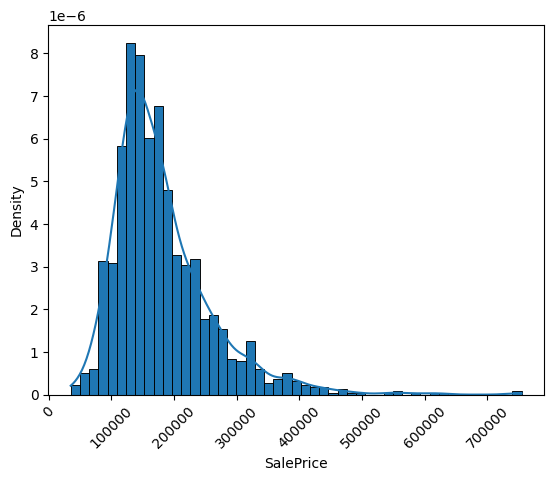

In [120]:
plot_univariate(train, 'SalePrice')

In [113]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


We notice that SalePrice :
- doesn't have a normal distribution
- has positive shewness
- has positive kurtosis (peakedness)

In [23]:
def plot_univariate_subplot(df, col_list):
    """
    Display a subplot of the univariate analysis for the columns in col_list 
    for dataframes df1 (train) and df2 (test)
    """
    if col_list == qualitative:
        fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(20, 60))
    else:
        fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
    
    # Flatten the 2D axes array for easier iteration
    axes_flat = axes.flatten()
    
    for i, ax in enumerate(axes_flat):
        if i < len(col_list):
            plot_univariate(df, col_list[i], ax=ax)
        else:
            # Hide unused subplots if you have fewer than 44 columns
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [116]:
def plot_univariate_subplot(df1, df2, col_list):
    """
    Display a subplot of the univariate analysis for the columns in col_list 
    for dataframes df1 (train) and df2 (test) with different colors and shading
    """
    if col_list == qualitative:
        fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(20, 60))
    else:
        fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
    
    # Define colors
    train_color = '#1f77b4'  # Blue
    test_color = '#ff7f0e'   # Orange
    
    axes_flat = axes.flatten()
    
    for i, ax in enumerate(axes_flat):
        if i < len(col_list):
            col = col_list[i]
            
            # Plot train data (solid, darker)
            plot_univariate(df1, col, ax=ax, color=train_color, alpha=0.8, 
                           label='Train', is_shaded=False)
            
            # Plot test data (shaded, lighter)
            plot_univariate(df2, col, ax=ax, color=test_color, alpha=0.6, 
                           label='Test', is_shaded=True)
            
            ax.legend()
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

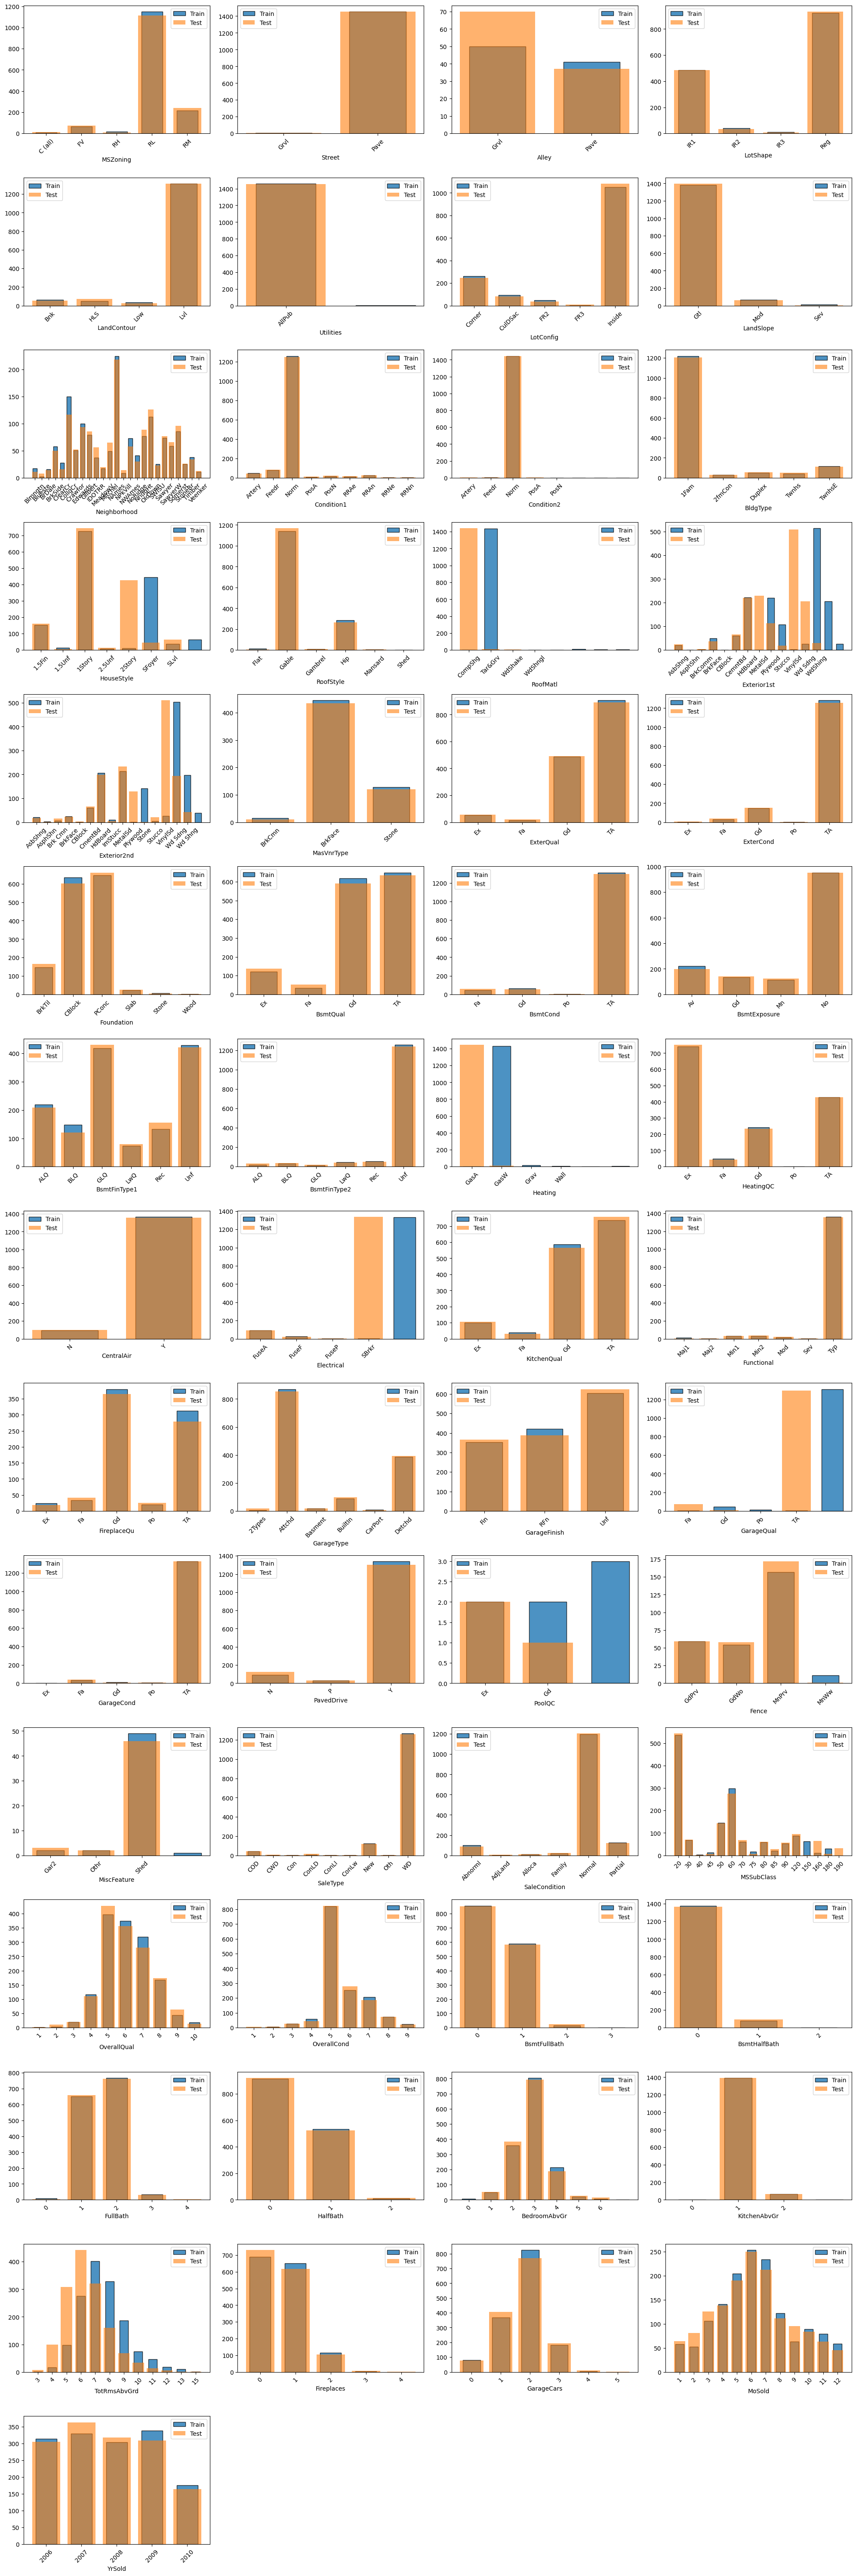

In [117]:
plot_univariate_subplot(train, test, qualitative)

In [121]:
# TODO : check feature spelling
imbalanced_qualitative_features = ['Street', Utilities, Landslope, Condition1, Condition2, BldgType
PoolMatl, BsmtCond, BsmtExposure, BsmtFinType2, Heating, CentralAir, Electrical, Functional, GarageCual, GarageCond, 
PavedDrive, SaleType, SaleCondition, KitchenAbvGr]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2065369069.py, line 2)

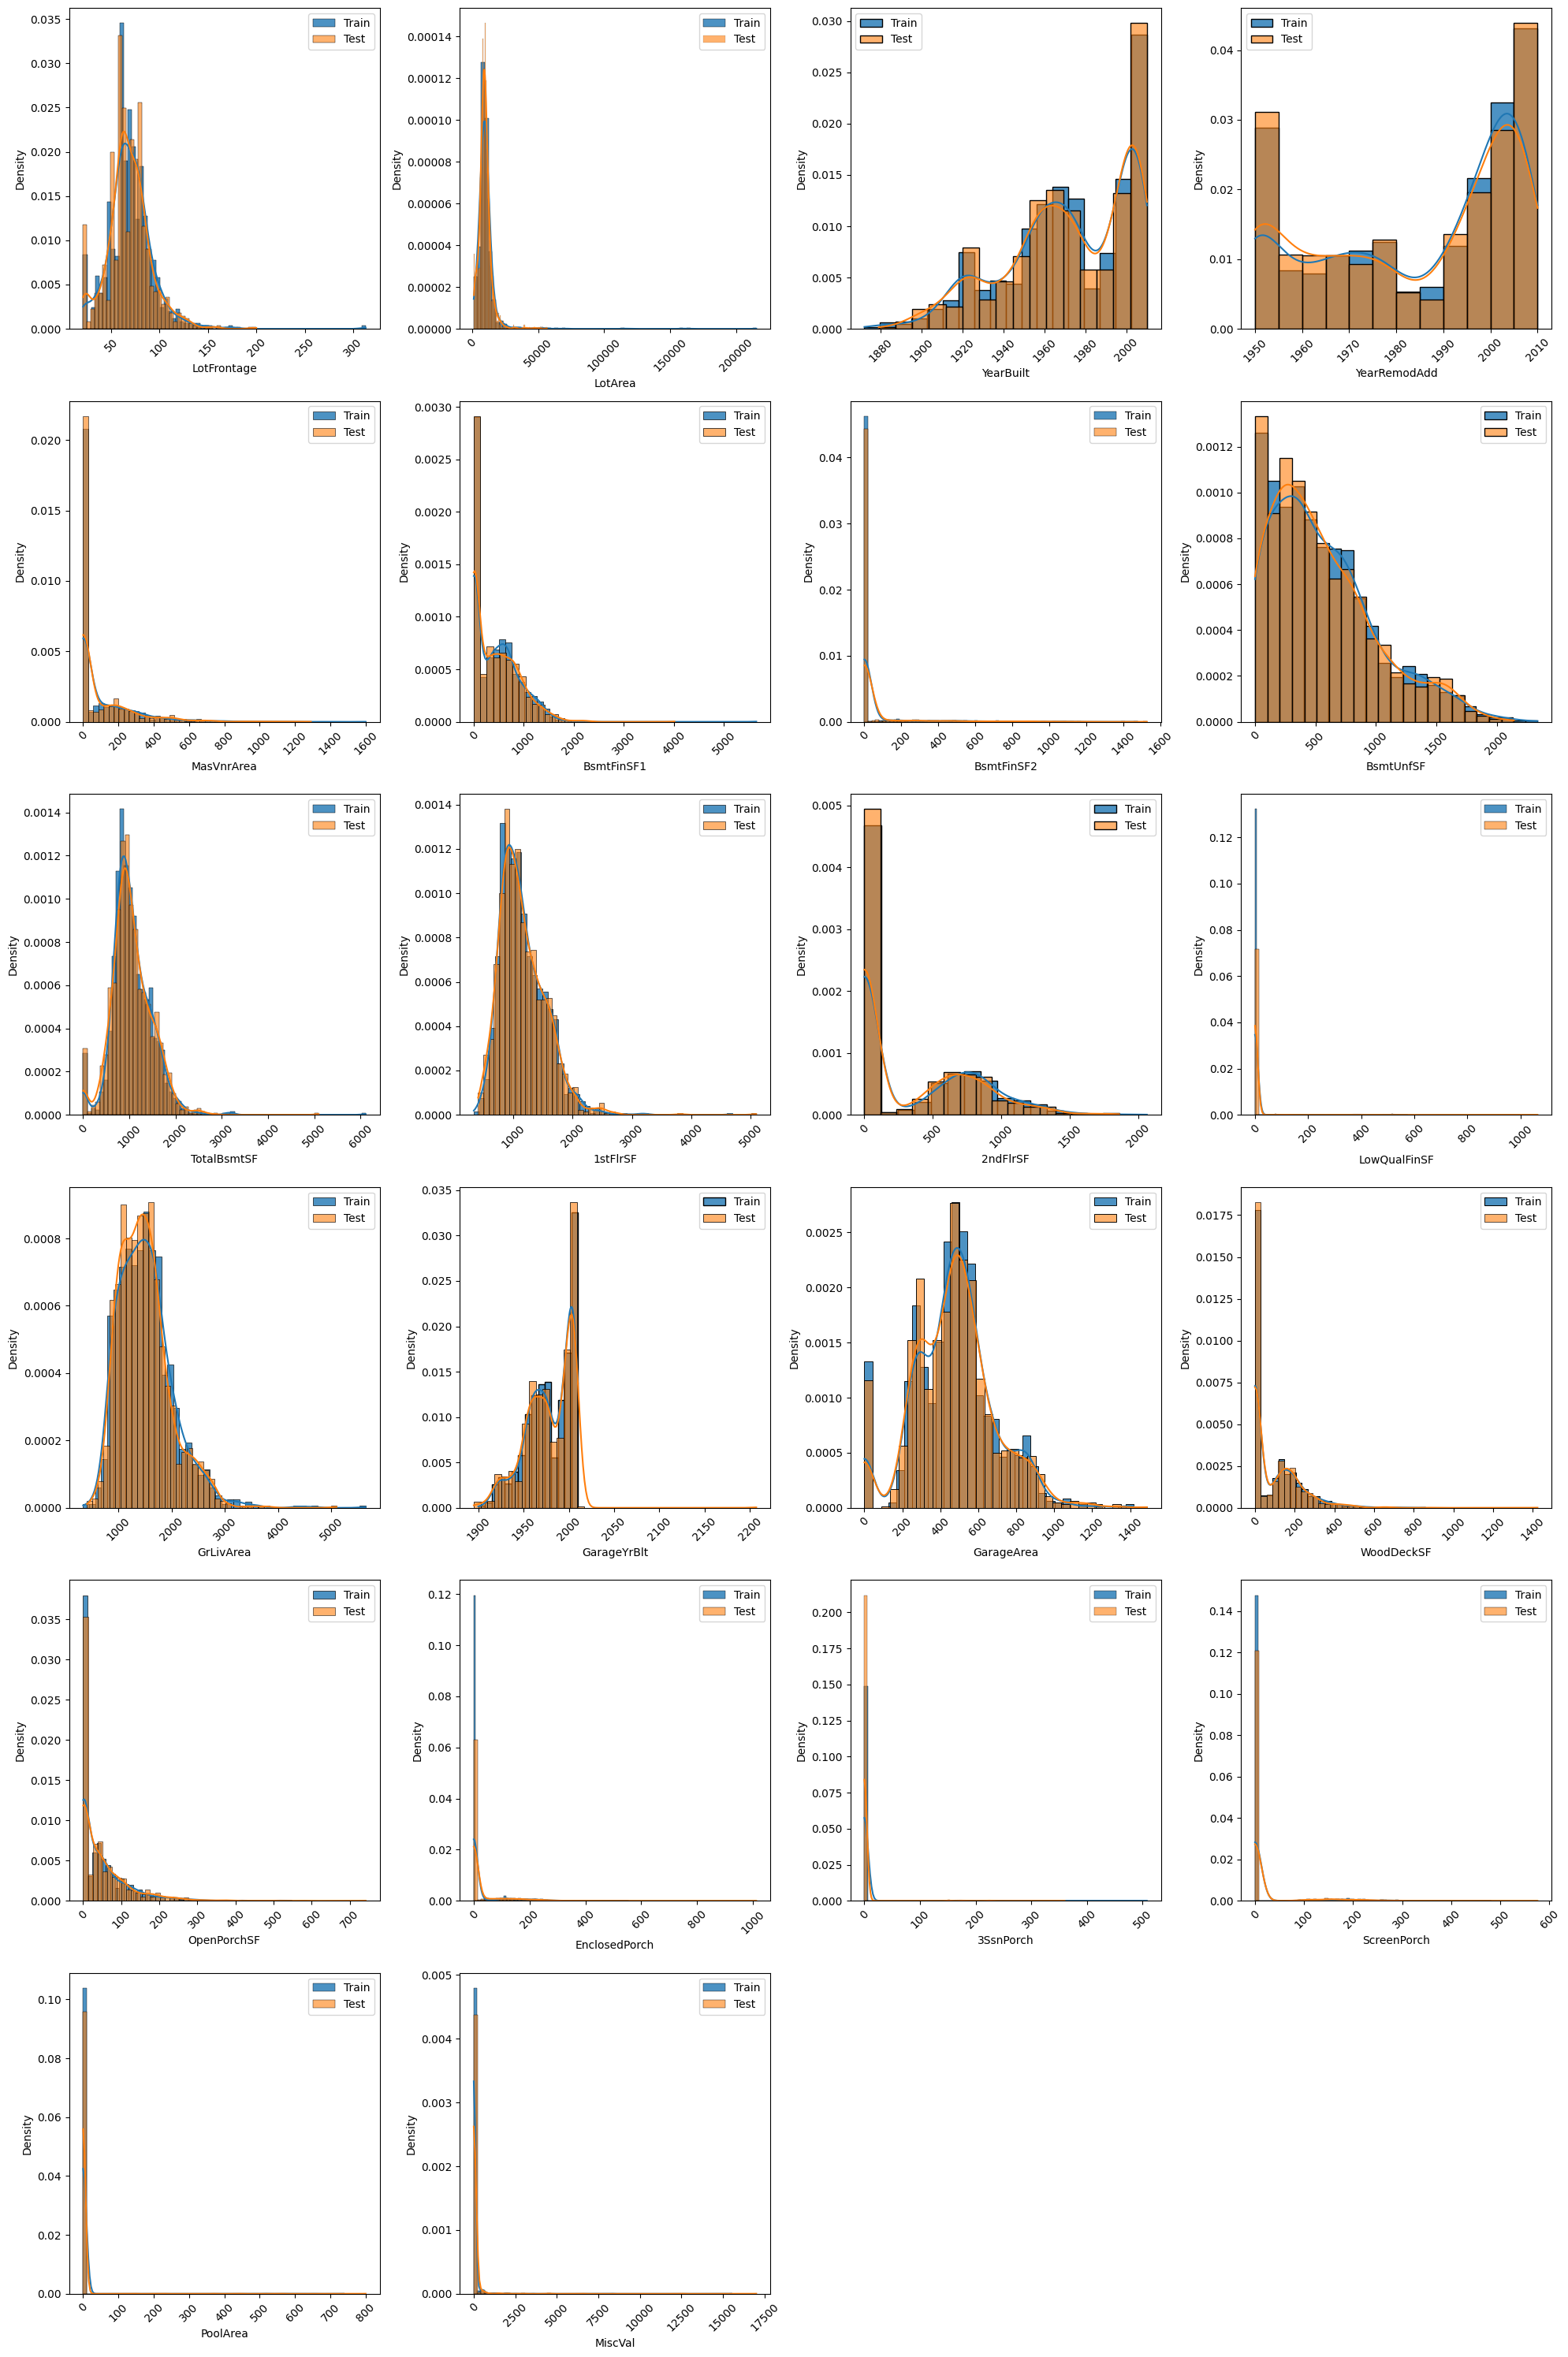

In [118]:
plot_univariate_subplot(train, test, quantitative)

In [122]:
# TODO
col_to_convert_to_categorical = []

In [26]:
results = []

# Test for normality using Shapiro-Wilk Test
test_normality = lambda x: stats.shapiro(x.dropna())[1] > 0.05

for col in ['SalePrice'] + quantitative:
    column_stats = {
        'column': col,
        'mean': train[col].mean(),
        'median': train[col].median(),
        'mode': train[col].mode().iloc[0],
        'std': train[col].std(),
        'skew': train[col].skew(),
        'kurt': train[col].kurt(),
        'min': train[col].min(),
        'max': train[col].max(),
        'normally distributed?': test_normality(train[col])
    }
    results.append(column_stats)

summary_df = pd.DataFrame(results)
summary_df.set_index('column', inplace=True)

summary_df

,mean,median,mode,std,skew,kurt,min,max,normally distributed?
column,,,,,,,,,
SalePrice,180921.195890,163000.0,140000.0,79442.502883,1.882876,6.536282,34900.0,755000.0,False
LotFrontage,70.049958,69.0,60.0,24.284752,2.163569,17.452867,21.0,313.0,False
LotArea,10516.828082,9478.5,7200.0,9981.264932,12.207688,203.243271,1300.0,215245.0,False
YearBuilt,1971.267808,1973.0,2006.0,30.202904,-0.613461,-0.439552,1872.0,2010.0,False
YearRemodAdd,1984.865753,1994.0,1950.0,20.645407,-0.503562,-1.272245,1950.0,2010.0,False
MasVnrArea,103.685262,0.0,0.0,181.066207,2.669084,10.082417,0.0,1600.0,False
BsmtFinSF1,443.639726,383.5,0.0,456.098091,1.685503,11.118236,0.0,5644.0,False
BsmtFinSF2,46.549315,0.0,0.0,161.319273,4.255261,20.113338,0.0,1474.0,False
BsmtUnfSF,567.240411,477.5,0.0,441.866955,0.920268,0.474994,0.0,2336.0,False


All numerical features are not normally distributed.

In [ ]:
# NORMALITY TEST

def test_normality_1460(data, alpha=0.05, feature_name=""):
    """
    Comprehensive normality testing for medium-large samples (1460)
    """
    # Remove NaN values
    clean_data = data.dropna()
    n = len(clean_data)
    
    if n < 3:
        return {"normal": False, "test_used": "insufficient_data", "n": n}
    
    results = {}
    
    # 1. Shapiro-Wilk (good for n < 2000)
    try:
        shapiro_stat, shapiro_p = shapiro(clean_data)
        results['shapiro_p'] = shapiro_p
        results['shapiro_normal'] = shapiro_p > alpha
    except:
        results['shapiro_normal'] = False
    
    # 2. Anderson-Darling (good for all sample sizes)
    try:
        anderson_result = anderson(clean_data, dist='norm')
        # Use 5% significance level (index 2)
        results['anderson_stat'] = anderson_result.statistic
        results['anderson_normal'] = anderson_result.statistic < anderson_result.critical_values[2]
    except:
        results['anderson_normal'] = False
    
    # 3. Kolmogorov-Smirnov (good for large samples)
    try:
        mu, sigma = clean_data.mean(), clean_data.std()
        ks_stat, ks_p = kstest(clean_data, 'norm', args=(mu, sigma))
        results['ks_p'] = ks_p
        results['ks_normal'] = ks_p > alpha
    except:
        results['ks_normal'] = False
    
    # 4. D'Agostino's K² test (good for large samples)
    try:
        k2_stat, k2_p = normaltest(clean_data)
        results['dagostino_p'] = k2_p
        results['dagostino_normal'] = k2_p > alpha
    except:
        results['dagostino_normal'] = False
    
    # Final decision (majority vote)
    normal_tests = [results.get('shapiro_normal', False), 
                   results.get('anderson_normal', False),
                   results.get('ks_normal', False),
                   results.get('dagostino_normal', False)]
    
    results['normal'] = sum(normal_tests) >= 2  # At least 2 tests indicate normality
    results['n'] = n
    results['skewness'] = stats.skew(clean_data)
    results['kurtosis'] = stats.kurtosis(clean_data)
    
    return results

def test_normality_batch(df, numerical_features, alpha=0.05):
    """
    Test normality for all numerical features in dataframe
    """
    results = {}
    
    for feature in numerical_features:
        print(f"Testing {feature}...")
        results[feature] = test_normality_1460(df[feature], alpha, feature)
    
    # Create results DataFrame
    results_df = pd.DataFrame(results).T
    
    # Calculate summary statistics
    results_df['is_normal'] = results_df['normal']
    normal_count = results_df['is_normal'].sum()
    total_count = len(results_df)
    
    print(f"\n=== NORMALITY TEST RESULTS ===")
    print(f"Normal features: {normal_count}/{total_count} ({normal_count/total_count*100:.1f}%)")
    
    return results_df.sort_values('is_normal', ascending=False)

def plot_normality_diagnostics(df, feature):
    """
    Create comprehensive normality diagnostic plots
    """
    data = df[feature].dropna()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Normality Diagnostics: {feature}', fontsize=16, fontweight='bold')
    
    # 1. Histogram with normal curve
    sns.histplot(data, kde=True, stat='density', ax=axes[0, 0])
    mu, sigma = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    axes[0, 0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    axes[0, 0].set_title('Histogram with Normal Fit')
    
    # 2. Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot')
    
    # 3. Box plot
    sns.boxplot(y=data, ax=axes[1, 0])
    axes[1, 0].set_title('Box Plot')
    
    # 4. Statistical test results
    test_results = test_normality_1460(data, feature_name=feature)
    textstr = '\n'.join([
        f'n: {test_results["n"]}',
        f'Skewness: {test_results["skewness"]:.3f}',
        f'Kurtosis: {test_results["kurtosis"]:.3f}',
        f'Shapiro-Wilk p: {test_results.get("shapiro_p", "N/A"):.4f}',
        f'Anderson-Darling: {"Normal" if test_results.get("anderson_normal", False) else "Not Normal"}',
        f'Final: {"NORMAL" if test_results["normal"] else "NOT NORMAL"}'
    ])
    
    axes[1, 1].text(0.1, 0.5, textstr, transform=axes[1, 1].transAxes, fontsize=12,
                   verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Test Results')
    
    plt.tight_layout()
    plt.show()
    
    return test_results

def generate_normality_report(df, numerical_features, alpha=0.05):
    """
    Generate comprehensive normality report
    """
    results = test_normality_batch(df, numerical_features, alpha)
    
    print("=" * 80)
    print("COMPREHENSIVE NORMALITY REPORT")
    print("=" * 80)
    
    # Summary statistics
    normal_features = results[results['is_normal']].index.tolist()
    non_normal_features = results[~results['is_normal']].index.tolist()
    
    print(f"\nNORMAL FEATURES ({len(normal_features)}):")
    print(", ".join(normal_features[:10]) + ("..." if len(normal_features) > 10 else ""))
    
    print(f"\nNON-NORMAL FEATURES ({len(non_normal_features)}):")
    print(", ".join(non_normal_features[:10]) + ("..." if len(non_normal_features) > 10 else ""))
    
    # Skewness and Kurtosis analysis
    print(f"\nSKEWNESS ANALYSIS:")
    print(f"Mean skewness: {results['skewness'].mean():.3f}")
    print(f"Max skewness: {results['skewness'].max():.3f} ({results['skewness'].idxmax()})")
    print(f"Min skewness: {results['skewness'].min():.3f} ({results['skewness'].idxmin()})")
    
    print(f"\nKURTOSIS ANALYSIS:")
    print(f"Mean kurtosis: {results['kurtosis'].mean():.3f}")
    print(f"Max kurtosis: {results['kurtosis'].max():.3f} ({results['kurtosis'].idxmax()})")
    print(f"Min kurtosis: {results['kurtosis'].min():.3f} ({results['kurtosis'].idxmin()})")
    
    return results



# For your 1460-sample dataset
def analyze_dataset_normality(df):
    """
    Complete normality analysis for your dataset
    """
    # Identify numerical features
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Dataset shape: {df.shape}")
    print(f"Numerical features: {len(numerical_features)}")
    
    # Test normality
    normality_results = test_normality_batch(df, numerical_features)
    
    # Generate report
    report = generate_normality_report(df, numerical_features)
    
    # Plot diagnostics for the most non-normal feature
    most_non_normal = normality_results.sort_values('shapiro_p').index[0]
    print(f"\nMost non-normal feature: {most_non_normal}")
    plot_normality_diagnostics(df, most_non_normal)
    
    # Plot diagnostics for the most normal feature
    most_normal = normality_results.sort_values('shapiro_p', ascending=False).index[0]
    print(f"\nMost normal feature: {most_normal}")
    plot_normality_diagnostics(df, most_normal)
    
    return normality_results


normality_results = analyze_dataset_normality(train)

## 4.2. Bivariate analysis

Understand the relationships between features and the target variable using scatterplots, correlation coefficients / matrix.

In [27]:
def plot_bivariate(df, col, ax=None):
    """ plot scatter or boxplot of SalePrice vs col on specified axes """

    if ax is None:
        ax = plt.gca()
        
    if col in qualitative:
        # for categorical variables
        sns.boxplot(x=col, y='SalePrice', data=df, ax=ax)
    else:
        # for numerical variables
        sns.regplot(x=col, y='SalePrice', data=df, line_kws={'color': 'red'}, ax=ax)

    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)

In [28]:
def plot_bivariate_subplot(df, col_list):
    """
    Display a subplot of the bivariate analysis for the columns in col_list of the dataframe df
    """    
    if col_list == qualitative:
        fig, axes = plt.subplots(nrows=15, ncols=4, figsize=(20, 60))
    else:
        fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
    
    # Flatten the 2D axes array for easier iteration
    axes_flat = axes.flatten()
    
    for i, ax in enumerate(axes_flat):
        if i < len(col_list):
            plot_bivariate(df, col_list[i], ax=ax)
        else:
            # Hide unused subplots if you have fewer than 44 columns
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

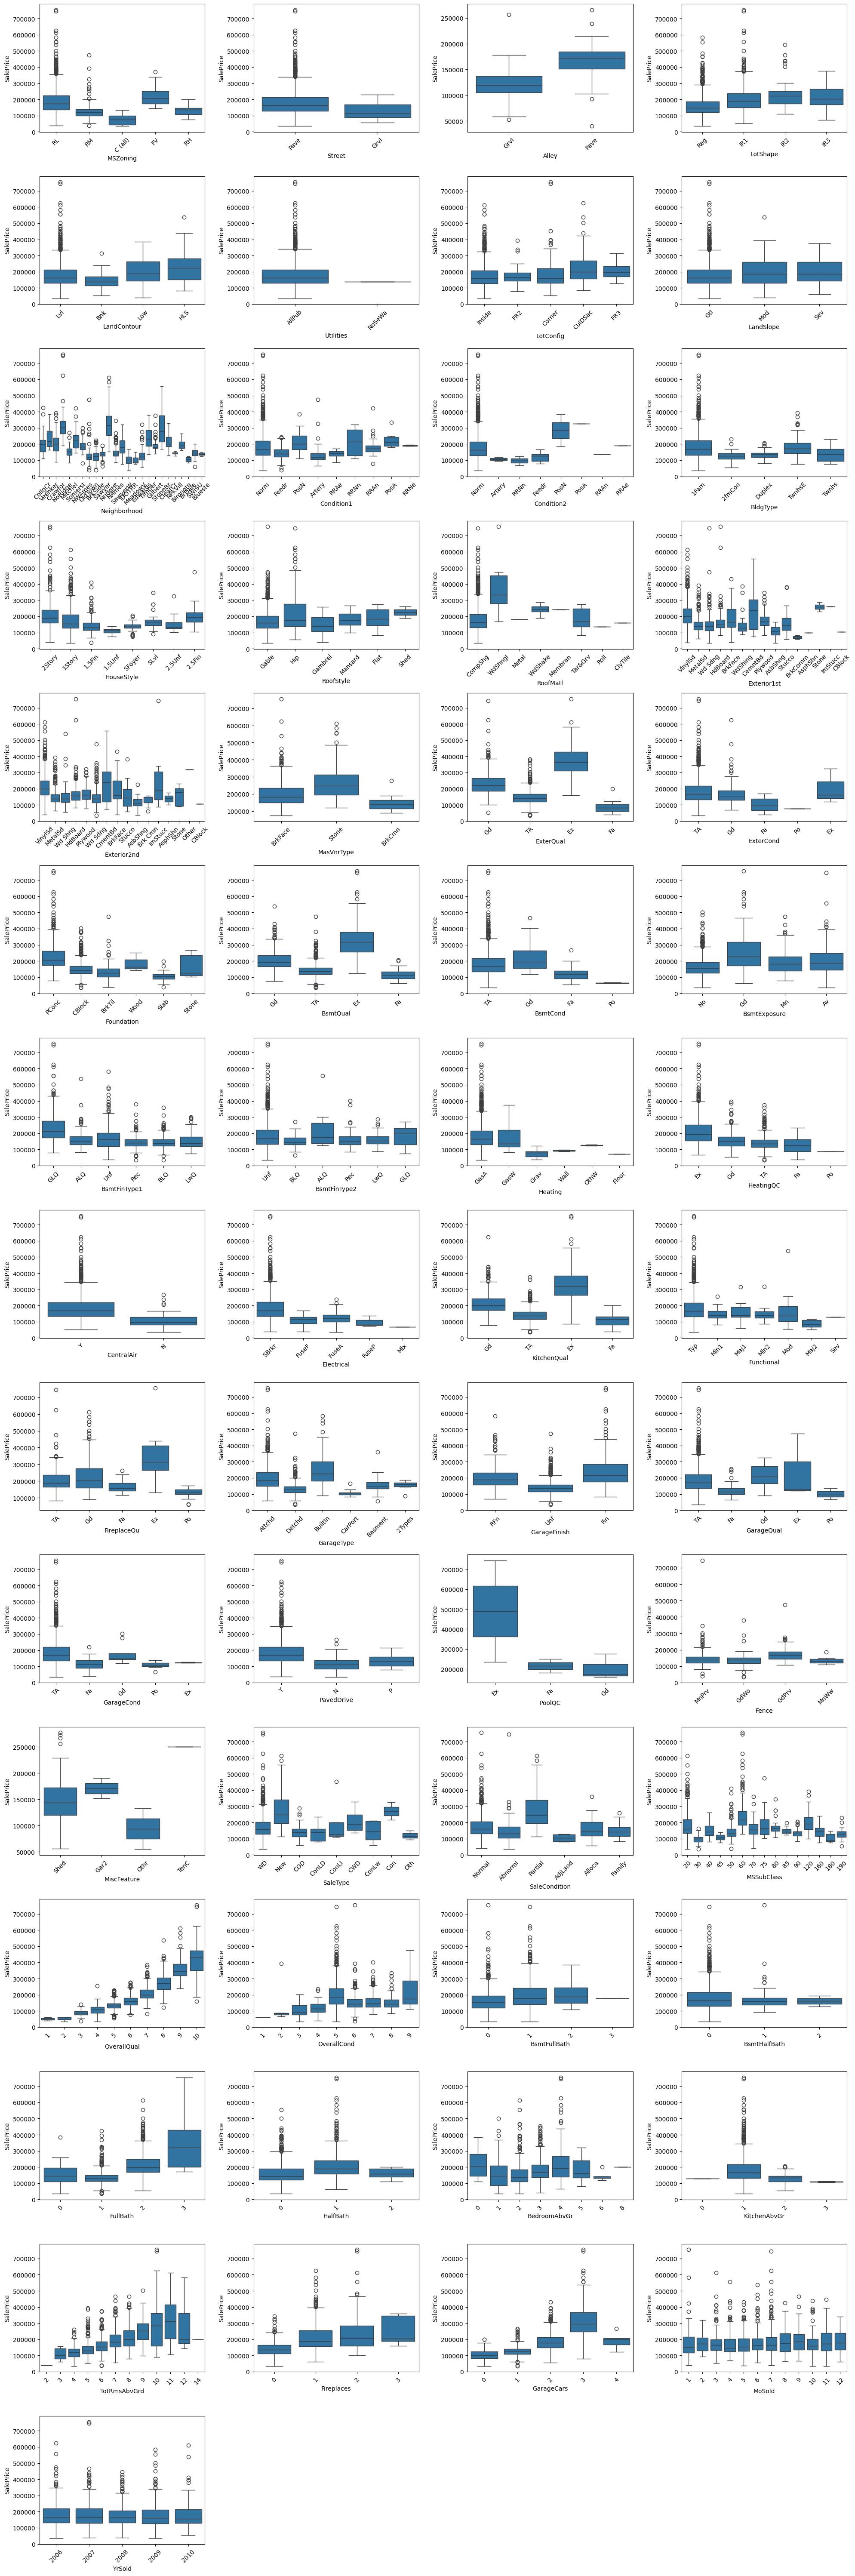

In [29]:
plot_bivariate_subplot(train, qualitative)

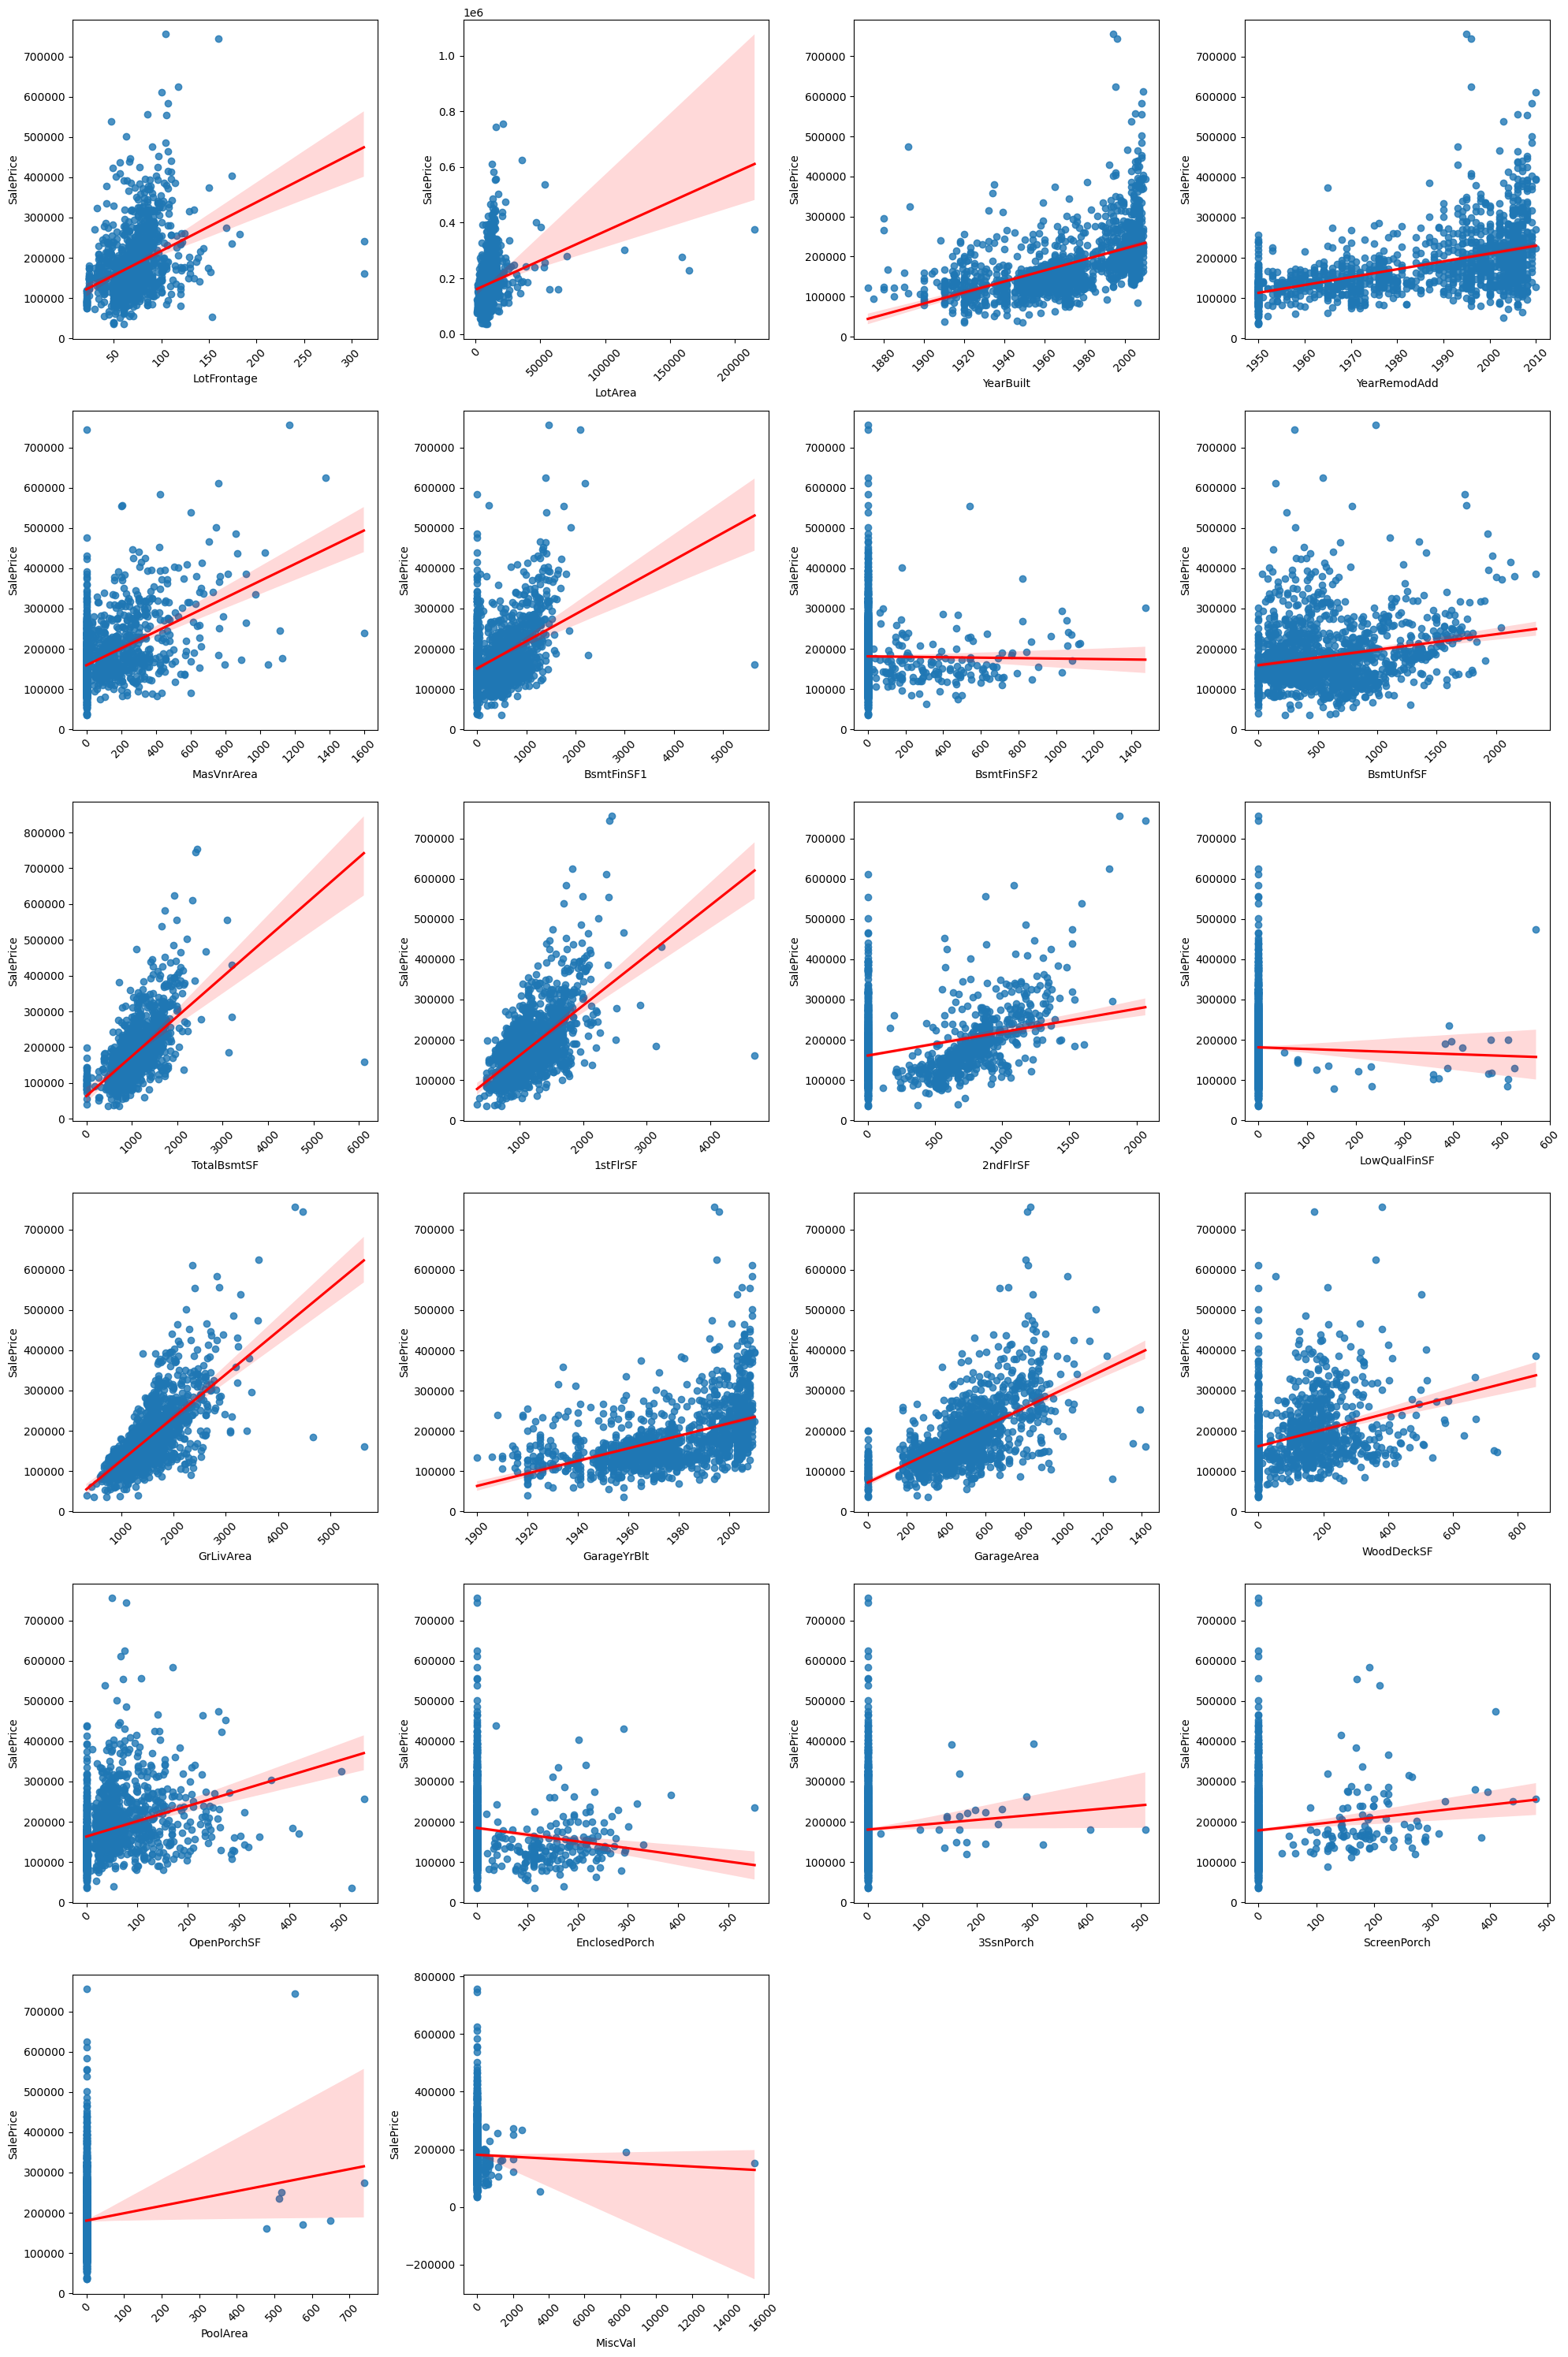

In [30]:
plot_bivariate_subplot(train, quantitative)

Some features have a lot of zeros values, meaning that the house does not have the specific attribute (bathroom, pool, porch, etc...). It might be worth converting these numerical features into categorical.

Some features correlate well with SalePrice, but many don't.

## 4.3. Handle Outliers

In [31]:
train[train['TotalBsmtSF'] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [32]:
train[train['BsmtFinSF1'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [33]:
train[train['GrLivArea'] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [34]:
train[train['MiscVal'] > 10000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [35]:
train[train['EnclosedPorch'] > 500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


It looks like the house with Id has many outlier features. Let's drop it so that it does not affect the predictions.

In [36]:
train[train['Id'] != 1299]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 4.4. Handle missing values

# 5. Feature engineering

## 5.1. Create new features

Let's engineer relevant features that might improve predictive performance.

## 5.2 Remove irrelevant features
Let's eliminate features that do not contribute much to the prediction. Many ML algorithms, such as Random Forest, provide a feature importance score.

## 5.3. Feature Normalization (handle skewness)

Many regression models assume normally distributed data. Let's fix skewed features by applying log transform.

In [37]:
for col in quantitative:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

train['SalePrice'] = np.log1p(train['SalePrice'])

## 5.4. Feature Scaling

Scaling numerical features improves distance-based calculations (for KNN, SVM classifiers) and prevents feature dominance.

In [155]:
def scale_features(df):
    """ scale numerical features """

    mew = df[quantitative].mean(axis=0)
    std = df[quantitative].std(axis=0)
    df[quantitative] = (df[quantitative] - mew) / std

    return df

In [157]:
train = scale_features(train)
test = scale_features(test)

## 5.5. Remove colinear features

This improves the model's stability and interpretability, and reduces overfitting. (spearman correlation)

## 5.6. Encode categorical features

Let's convert categorical features into numerical form using techniques like one-hot encoding or label encoding.

Note : using drop_first=True creates 1 column instead of 2 for 2 categories (dummy variable trapping). This avoids multicollinearity between columns.

In [ ]:
def one_hot_encoding(df):
    """ 
    Perform one hot encoding on features Sex, Pclass, Deck, Embarked and Title. 
    Concatenate to the main dataframe.
    """
    df_sex = pd.get_dummies(df['Sex'], prefix='sex', drop_first=True, dtype=int)
    df_Pclass = pd.get_dummies(df['Pclass'], prefix='class', drop_first=True, dtype=int)
    df_Embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True, dtype=int)
    df_Deck = pd.get_dummies(df['Deck'], prefix='Deck', drop_first=False, dtype=int)
    df_Title = pd.get_dummies(df['Title'], prefix='Title', drop_first=False, dtype=int)

    df = pd.concat([df, df_sex, df_Pclass, df_Embarked, df_Deck, df_Title], axis=1)
    return df 

# 6. Choose an Evaluation Metrics
For regression problems, common metrics include:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared

For classification problems, common metrics include:
- Accuracy
- Precision
- Recall
- F1-score
- AUC

The confusion matric and ROC Curve can also bring useful insights. 

# 7. Select Algorithms
- Start with simple regression algorithms like Linear Regression and gradually explore more complex models like Random Forest, Gradient Boosting, or XGBoost.
- Consider simple ensemble methods, such as simple average, weighted average, or voting ensembles, to combine multiple models for potentially better results.
- The model chosen depends on the data. A more complex model does not always constitute a better model.

# 8. Model Validation
- Split the data into training and validation sets. A common split is 70-30 or 80-20 for training and validation, respectively. This method is computationally less intensive and often used for initial model exploration or when dealing with very large datasets.
- K-Fold Cross Validation. This method provides a more reliable evaluation, especially with smaller datasets.
- Model validation is important to assess the model's generalization performance (i.e. assess how well the model performs on unseen data). This helps prevent overfitting and gives you a more reliable estimate of your model's performance.

# 9. Hyperparameter Tuning
- Tune the hyperparameters of your chosen algorithms on the validation dataset using techniques like grid search or random search to find the best combination.
- Optuna is an efficient and effective way to search for optimal hyperparameters.

# 10. Regularization
- Implement regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting.
- Many ML algorithms include regularization parameters, including L1 and L2, sometimes called reg_alpha or reg_lambda. Read up on your chosen algorithms regularization parameters and tune them accordingly on your validation set.

# 11. Train the final model

- Fit the best model using the optimal hyperparameters found on the whole training set (including the validation set)
- Model persistence : save the model weights for future use.

In [ ]:
def classification_model(model, X_train, X_test, y_train):
    """
    Train a classification model and assessing performance
    model: eg. model = LogisticRegression()
    X_train: train dataframe without the target column
    X_test: test dataframe    
    y_train: target column
    """
    
    # Use model class name as model name
    model_name = model.__class__.__name__
    print(f"Training: {model_name}")    
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = np.mean(scores)
    cv_std = np.std(scores)
    
    # Predictions on train set
    y_pred_train = model.predict(X_train)
    
    # Predict on test set 
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    precision = metrics.precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    recall = metrics.recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    f1 = metrics.f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
    
    # Create results dictionary
    results_dict = {
        'Model_Name': model_name,
        'Train_Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std
    }
    
    return y_pred_test, y_pred_train, results_dict

# 12. Generate predictions on the test set